# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Jaya Srinivas

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [8]:
%pip install requests
%pip install spacy
%pip install textblob
%pip install bs4
%pip install matplotlib
%pip install ipykernel
%pip install numpy
%pip install nltk


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgr

In [ ]:
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import requests
import spacy
from textblob import TextBlob

# URL of the article
url = "https://www.britannica.com/topic/Indian-cuisine"

# Send GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write mode with UTF-8 encoding
    with open('indian_cuisine.html', 'w', encoding='utf-8') as file:
        # Write the HTML content to the file
        file.write(response.text)
    print("Article HTML has been successfully saved to 'indian_cuisine.html'")
else:
    print(f"Failed to fetch the article. Status code: {response.status_code}")

Article HTML has been successfully saved to 'indian_cuisine.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [17]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Open the saved HTML file and read its content
with open('indian_cuisine.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text (this depends on the HTML structure)
article_text = soup.get_text()

# Perform sentiment analysis using TextBlob
blob = TextBlob(article_text)
polarity = blob.sentiment.polarity

# Count the number of sentences in the article
sentence_count = len(article_text.split('.'))  # Simple way to count sentences

# Print the results
print(f"Polarity score of the article: {polarity:.3f}")
print(f"Number of sentences in the article: {sentence_count}")

Polarity score of the article: 0.090
Number of sentences in the article: 136


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [5]:
# Attemtping to hard install spacy due to issues when installing in environment
!python3 -m spacy download en_core_web_sm
%pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0.tar.gz
!python3 -m spacy validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [634 lines of output]
        Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.1

In [6]:
# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('indian_cuisine.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list of tokens (lowercased) that are not punctuation, stop words, or empty strings
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and token.text.strip()]

# Use Counter to find the 5 most common tokens
token_frequencies = Counter(tokens)
most_common_tokens = token_frequencies.most_common(5)

# Print the results
print("Most common tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Most common tokens:
Token: 'indian', Frequency: 41
Token: 'india', Frequency: 38
Token: 'cuisine', Frequency: 25
Token: 'food', Frequency: 16
Token: 'rice', Frequency: 13


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [7]:
# Create a list of lemmas, excluding punctuation and whitespace
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Five Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

Five Most Common Lemmas:
Lemma: 'the' - Frequency: 136
Lemma: 'and' - Frequency: 118
Lemma: 'be' - Frequency: 113
Lemma: 'of' - Frequency: 105
Lemma: 'in' - Frequency: 81


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

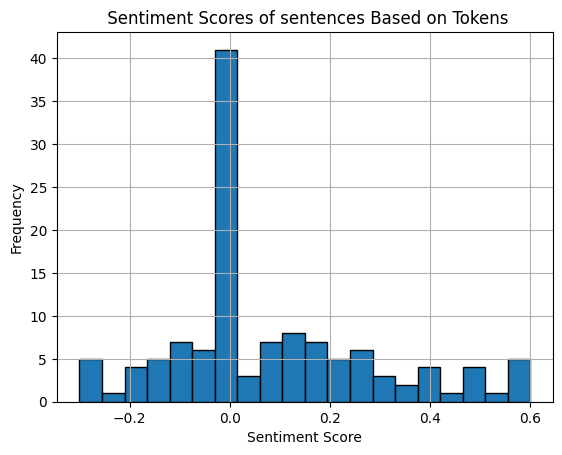

In [8]:
# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Open the saved HTML file and read its content
with open('indian_cuisine.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the main article text
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Split the article into sentences
sentences = list(doc.sents)

# Calculate sentiment scores for each sentence using TextBlob
sentence_scores = [TextBlob(sentence.text).sentiment.polarity for sentence in sentences]

# Plot the histogram of sentence scores
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title(' Sentiment Scores of sentences Based on Tokens')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


Most frequent bin range: 17.0-22.4
Minimum score: 1
Maximum score: 108
Average score: 19.41


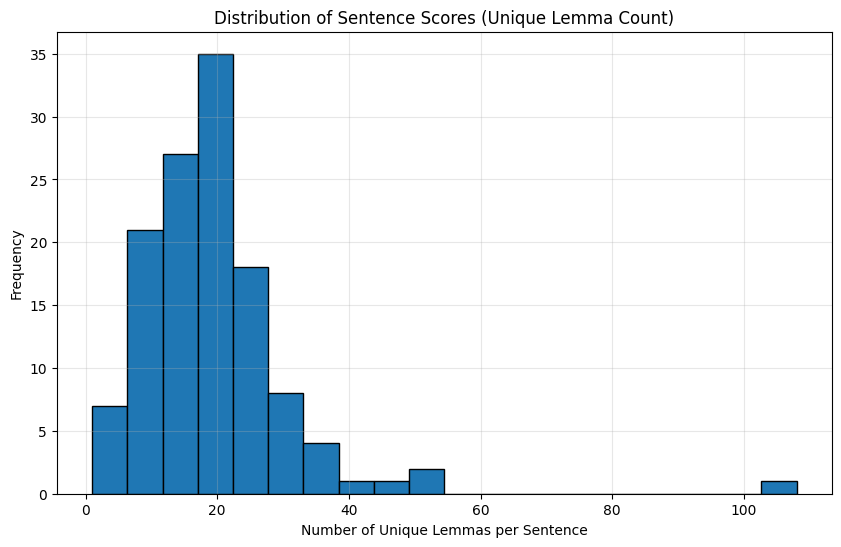

In [12]:
# Calculate sentence scores using lemmas (ensuring we're actually using lemmas)
sentence_scores_lemmas = []
for sent in doc.sents:
    # Count unique lemmas in the sentence (excluding punctuation and spaces)
    lemmas = set(token.lemma_.lower() for token in sent 
                 if not token.is_punct and not token.is_space)
    sentence_scores_lemmas.append(len(lemmas))

# Create histogram and get the bin counts and edges
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Sentence Scores (Unique Lemma Count)')
plt.xlabel('Number of Unique Lemmas per Sentence')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Find the bin with highest frequency
max_count_idx = np.argmax(counts)
bin_start = bins[max_count_idx]
bin_end = bins[max_count_idx + 1]
print(f"\nMost frequent bin range: {bin_start:.1f}-{bin_end:.1f}")

# Print some basic statistics
print(f"Minimum score: {min(sentence_scores_lemmas)}")
print(f"Maximum score: {max(sentence_scores_lemmas)}")
print(f"Average score: {sum(sentence_scores_lemmas)/len(sentence_scores_lemmas):.2f}")

plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.15
* Cutoff Score (lemmas): 25

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [13]:
# Initialize empty list for summary sentences 
summary_sentences = []

# Calculate scores and add sentences that exceed cutoff
for sent in doc.sents:
    # Count tokens (excluding punctuation and spaces)
    score = len([token for token in sent if not token.is_punct and not token.is_space])
   
    # If score exceeds cutoff, add sentence to summary
    if score > 0.15:
        summary_sentences.append(sent.text.strip())

# Join sentences with newlines and print summary
summary = '\n'.join(summary_sentences)
print(summary)

Indian cuisine | History, Regions, Dishes, & Facts | Britannica


















































Search Britannica





Click here to search











Search Britannica





Click here to search







   Subscribe



   Subscribe


Login

https://premium.britannica.com/premium-membership/?utm_source=premium&utm_medium=nav-login-box&utm_campaign=evergreen







  Subscribe  Now




Home
History & Society
Science & Tech
Biographies
Animals & Nature
Geography & Travel
Arts & Culture
ProCon
Money


Games & Quizzes
Videos
On This Day
One Good Fact
Dictionary
New Articles

History & Society

Lifestyles & Social Issues
Philosophy & Religion
Politics, Law & Government
World History

Science & Tech

Health & Medicine
Science
Technology

Biographies

Browse Biographies

Animals & Nature

Birds, Reptiles & Other Vertebrates
Bugs, Mollusks & Other Invertebrates
Environment
Fossils & Geologic Time
Mammals
Plants

Geography & Travel

Geography & Travel

Arts & Culture

Entertainm

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [18]:
# Get the summary text from the last cell
summary_text = '\n'.join(summary_sentences)

# Create TextBlob object for sentiment analysis
summary_blob = TextBlob(summary_text)

# Get polarity score and sentence count
polarity = summary_blob.sentiment.polarity
sentence_count = len(summary_sentences)

# Print results with labels
print(f"Token Summary Sentiment Polarity Score: {polarity:.3f}")
print(f"Number of sentences in the Token summary: {sentence_count}")

Token Summary Sentiment Polarity Score: 0.090
Number of sentences in the Token summary: 125


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [15]:
# Initialize empty list for summary sentences
lemma_summary_sentences = []

# Calculate scores and add sentences that exceed cutoff
for sent in doc.sents:
    # Get unique lemmas in the sentence (excluding punctuation and spaces)
    lemmas = set(token.lemma_.lower() for token in sent 
                 if not token.is_punct and not token.is_space)
    
    # Calculate lemma score
    score = len(lemmas)
    
    # If score exceeds cutoff, add sentence to summary
    if score > 25:
        lemma_summary_sentences.append(sent.text.strip())

# Join sentences with newlines and print summary
lemma_summary = '\n'.join(lemma_summary_sentences)
print(lemma_summary)

Indian cuisine | History, Regions, Dishes, & Facts | Britannica


















































Search Britannica





Click here to search











Search Britannica





Click here to search







   Subscribe



   Subscribe


Login

https://premium.britannica.com/premium-membership/?utm_source=premium&utm_medium=nav-login-box&utm_campaign=evergreen







  Subscribe  Now




Home
History & Society
Science & Tech
Biographies
Animals & Nature
Geography & Travel
Arts & Culture
ProCon
Money


Games & Quizzes
Videos
On This Day
One Good Fact
Dictionary
New Articles

History & Society

Lifestyles & Social Issues
Philosophy & Religion
Politics, Law & Government
World History

Science & Tech

Health & Medicine
Science
Technology

Biographies

Browse Biographies

Animals & Nature

Birds, Reptiles & Other Vertebrates
Bugs, Mollusks & Other Invertebrates
Environment
Fossils & Geologic Time
Mammals
Plants

Geography & Travel

Geography & Travel

Arts & Culture

Entertainm

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [16]:
# Get the summary text from the last cell
lemma_summary_text = '\n'.join(lemma_summary_sentences)

# Create TextBlob object for sentiment analysis
lemma_summary_blob = TextBlob(lemma_summary_text)

# Get polarity score and sentence count
lemma_polarity = lemma_summary_blob.sentiment.polarity
lemma_sentence_count = len(lemma_summary_sentences)

# Print results with labels
print(f"Lemma-Based Summary Sentiment Polarity Score: {lemma_polarity:.2f}")
print(f"Number of sentences in the lemma-based summary: {lemma_sentence_count}")

Lemma-Based Summary Sentiment Polarity Score: 0.06
Number of sentences in the lemma-based summary: 23


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Original Polarity: 0.09
Token Polarity: 0.09
Lemma Polarity: 0.06

The original and token polarity scores are the same (0.09), but the lemma polarity is lower (0.06) because lemmatization simplifies words and removes some emotional details. This suggests that simplifying text too much can reduce its sentiment strength.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

In my opinion, the token-based summary is likely better for capturing the sentiment and richness of the original article. This is because tokenization preserves the original word forms, including adjectives or descriptive language, which are important for reflecting the tone and depth of the article. Lemmatization, on the other hand, simplifies words to their base forms, which may remove important nuances.